# About the implementation
Objective: To Evaluate the Complexity of Robot Navigation Patterns

Assess whether the robot's navigation task exhibits distinct and potentially non-linear patterns by use unsupervised learning (k-means clustering) to identify clusters of similar sensor readings, with

k=4 chosen to explore the possibility of four distinct navigation behavior and Gain insights into the complexity of the navigation task, observe potential clusters corresponding to different robot behaviors, and inform further analysis or model development.

Unsupervised learning involves extracting patterns, structures, or relationships from data without explicit labels or predefined target values. K-means clustering, in particular, is a popular unsupervised learning technique that partitions data points.


# About the data set
https://archive.ics.uci.edu/dataset/194/wall+following+robot+navigation+data

The provided files comprise three different data sets. The first one contains the raw values of the measurements
of all 24 ultrasound sensors and the corresponding class label (see Section 7). Sensor readings are sampled at a
rate of 9 samples per second.

The second one contains four sensor readings named 'simplified distances' and the corresponding class label (see Section 7). These simplified distances are referred to as the 'front distance', 'left distance', 'right distance' and 'back distance'. They consist, respectively, of the minimum sensor readings among those within 60 degree arcs located at the front, left, right and back parts of the robot.

The third one contains only the front and left simplified distances and the corresponding class label.

It is worth mentioning that the 24 ultrasound readings and the simplified distances were collected at the same time step, so each file has the same number of rows (one for each sampling time step).

The wall-following task and data gathering were designed to test the hypothesis that this apparently simple navigation task is indeed a non-linearly separable classification task. Thus, linear classifiers, such as the Perceptron network, are not able to learn the task and command the robot around the room without collisions. Nonlinear neural classifiers, such as the MLP network, are able to learn the task and command the robot successfully without collisions.

If some kind of short-term memory mechanism is provided to the neural classifiers, their performances are improved in general. For example, if past inputs are provided together with current sensor readings, even the Perceptron becomes able to learn the task and command the robot succesfully. If a recurrent neural network, such as the Elman network, is used to learn the task, the resulting dynamical classifier is able to learn the task using less hidden neurons than the MLP network.

Files with different number of sensor readings were built in order to evaluate the performance of the classifiers with respect to the number of inputs.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


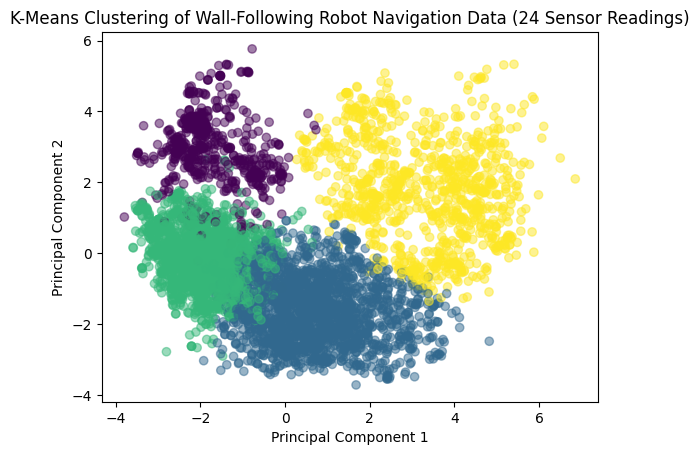

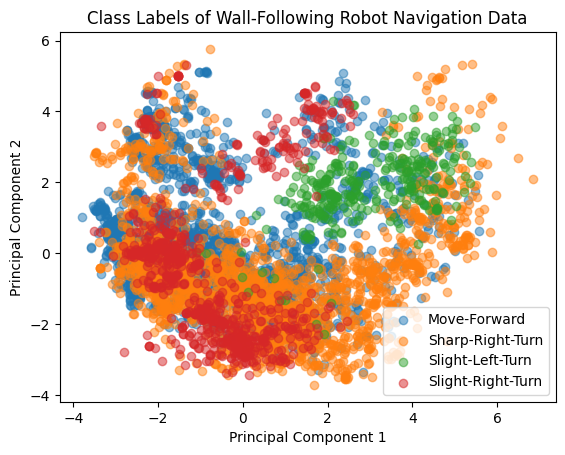

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = "/content/sensor_readings_24.data"
column_names = [f"Sensor_{i}" for i in range(24)] + ["Class Label"]
df = pd.read_csv(file_path, sep=",", header=None, names=column_names)
numerical_features = df.iloc[:, :-1].values
class_labels = df["Class Label"].values
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_numerical_features)

pca = PCA(n_components=2)
reduced_numerical_features = pca.fit_transform(scaled_numerical_features)

plt.scatter(reduced_numerical_features[:, 0], reduced_numerical_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Wall-Following Robot Navigation Data (24 Sensor Readings)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

unique_labels = np.unique(class_labels)
plt.figure()
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(reduced_numerical_features[indices, 0], reduced_numerical_features[indices, 1], label=label, alpha=0.5)
plt.title('Class Labels of Wall-Following Robot Navigation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


#some errors find while performing the implementation

ValueError                                Traceback (most recent call last)
<ipython-input-9-d81180acba66> in <cell line: 21>()
     19 # Standardize the numerical features
     20 scaler = StandardScaler()
---> 21 scaled_numerical_features = scaler.fit_transform(numerical_features)
     22
     23 # Apply k-means clustering

6 frames
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py in _asarray_with_order(array, dtype, order, copy, xp)
    183     if xp.__name__ in {"numpy", "numpy.array_api"}:
    184         # Use NumPy API to support order
--> 185         array = numpy.asarray(array, order=order, dtype=dtype)
    186         return xp.asarray(array, copy=copy)
    187     else:

ValueError: could not convert string to float: '0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,1.698,1.687,1.698,1.717,1.744,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn'

The issue obtained from the data in the file was not being recognized correctly due to an incorrect separator, causing a failure in converting a string to a float during the standardization process. The initial attempt to load the data assumed a default separator, leading to the inclusion of class labels in the last column as a single string. To address this, a modification was made to explicitly specify the correct separator, which, in this case, was a comma. This adjustment in the `pd.read_csv` function ensured that the data was properly separated into individual values, resolving the issue with reading and processing the dataset. The successful execution of the code following this modification highlighted the importance of accurately specifying data separators, particularly in real-world scenarios where datasets may exhibit diverse characteristics.

# Explanation

By solving the separator issue, the file was successfully loaded using the pandas `read_csv` function, explicitly specifying the correct comma separator. The data was organized into a DataFrame, and numerical features representing sensor readings were extracted for further analysis. Additionally, class labels were separated for subsequent visualization purposes. The extracted numerical features underwent standardization using the `StandardScaler` from scikit-learn, a crucial preprocessing step to ensure all features had a similar scale, facilitating accurate clustering. Subsequently, K-means clustering was applied to group similar data points into clusters, with the number of clusters (k) set to 4 in this example, a value subject to adjustment based on the desired level of granularity in the analysis. Principal Component Analysis (PCA) was employed for dimensionality reduction, reducing the feature space to two principal components for visualization. The clustered data points were plotted in a 2D space, providing insights into the patterns and relationships among the sensor readings. The use of PCA aids in visually understanding the structure of the data and the effectiveness of the clustering algorithm. The class labels, initially separated from the numerical features, were visualized separately to provide additional context to the analysis. Class labels were plotted in the same reduced feature space to observe how the clusters align with different behaviors of the robot. This dual visualization enhances the interpretability of the clustering results. Moving forward, several avenues for improvement exist. Exploring hyperparameter tuning, particularly experimenting with different values of `k`, can help identify the optimal configuration for the dataset. Consideration of advanced clustering algorithms beyond k-means, such as hierarchical clustering or density-based clustering, may unveil additional insights or patterns. Feature engineering should be explored to enhance the discriminatory power of the clustering model, especially in datasets with nuanced patterns like those in robotics. Integration of additional information, such as temporal aspects or correlations between sensor readings, can be considered for a more comprehensive model. Enhanced visualization techniques, including 3D plots or interactive visualizations, can provide a richer understanding of the data structure and clustering results. Lastly, the implementation of quantitative metrics, such as silhouette score or Davies-Bouldin index, can offer objective measures of cluster quality for thorough model evaluation. By addressing these future improvements, the analysis can be refined to uncover more nuanced patterns and enhance the overall quality of the unsupervised learning approach applied to the Wall-Following Robot Navigation dataset.

#Behavioral Patterns Exploration:

Why: The dataset has th to capture the navigation behavior of a robot in a wall-following task.

For What Purpose: By choosing
k=4, the analysis explores the possibility that the robot exhibits four distinct behavioral patterns during navigation. These patterns could correspond to forward movement, backward movement, left turns, and right turns.